Loading dataset...
Dataset loaded successfully.


c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
11195/11195 - 38s - 3ms/step - accuracy: 0.9796 - loss: 0.0577 - val_accuracy: 0.9969 - val_loss: 0.0119
Epoch 2/300
11195/11195 - 34s - 3ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9975 - val_loss: 0.0099
Epoch 3/300
11195/11195 - 38s - 3ms/step - accuracy: 0.9951 - loss: 0.0170 - val_accuracy: 0.9988 - val_loss: 0.0064
Epoch 4/300
11195/11195 - 40s - 4ms/step - accuracy: 0.9959 - loss: 0.0148 - val_accuracy: 0.9986 - val_loss: 0.0061
Epoch 5/300
11195/11195 - 33s - 3ms/step - accuracy: 0.9962 - loss: 0.0142 - val_accuracy: 0.9993 - val_loss: 0.0045
Epoch 6/300
11195/11195 - 32s - 3ms/step - accuracy: 0.9966 - loss: 0.0130 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 7/300
11195/11195 - 36s - 3ms/step - accuracy: 0.9969 - loss: 0.0121 - val_accuracy: 0.9990 - val_loss: 0.0054
Epoch 8/300
11195/11195 - 49s - 4ms/step - accuracy: 0.9970 - loss: 0.0113 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 9/300
11195/11195 - 44s - 4ms/step - accuracy: 0.9973 - lo

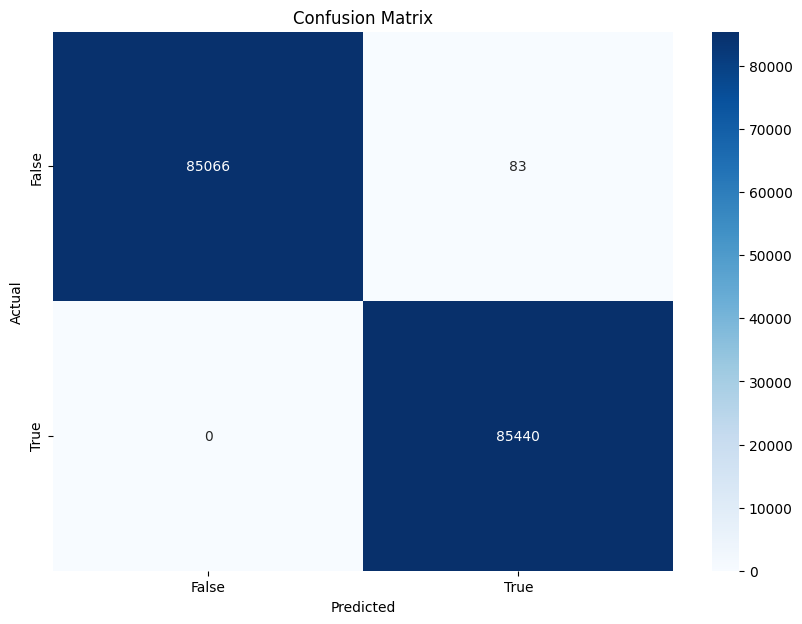

['scaler.pkl']

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = r'./creditcard_2023.csv'
print("Loading dataset...")
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Split the data into features and target
X = data.drop(columns=['id', 'Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the MLP model with dropout
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=300, batch_size=32, callbacks=[early_stopping], verbose=2)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and the scaler
model.save('mlp_fraud_detection_model_with_dropout.h5')
joblib.dump(scaler, 'scaler.pkl')
